# Deck 6: Subplots and Combining Visualizations

In [ ]:
# Load libraries and generate data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

np.random.seed(613)
x1 = np.arange(50)
y1 = np.random.randint(0, 75,50)
x2 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y2 = np.array([110, 180, 240, 99, 220])

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_79082/3448709671.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


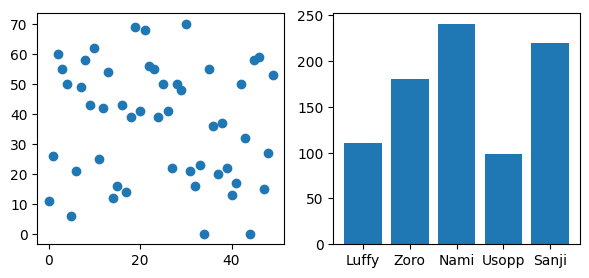

In [ ]:
# Making the first subplot set - one scatter, one bar
fig, (ax1, ax2) = plt.subplots(ncols=2,
                        nrows=1,
                        figsize=(7,3))

ax1.scatter(x1,y1)
ax2.bar(x2,y2)
fig.show()

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_79082/896642000.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


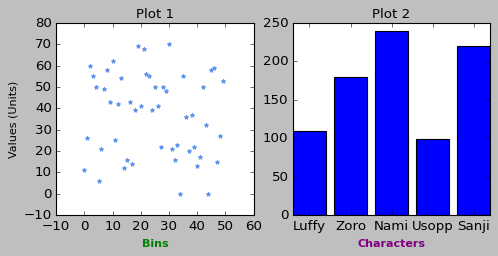

In [17]:
# Activity: Customizing the plots

plt.style.use("classic")
fig, (ax1, ax2) = plt.subplots(ncols=2,
                        nrows=1,
                        figsize=(7,3))

ax1.scatter(x1,y1,
            marker='*',
            s=12,
            color="cornflowerblue")
ax1.set_title("Plot 1", fontsize=12)
ax1.set_xlabel("Bins", fontsize=10, fontweight='bold', color="green")
ax2.bar(x2,y2)
ax2.set_xlabel("Characters", fontsize=10, fontweight='bold', color="purple")
ax1.set_ylabel("Values (Units)", fontsize=10)
ax2.set_title("Plot 2", fontsize=12)
fig.show()

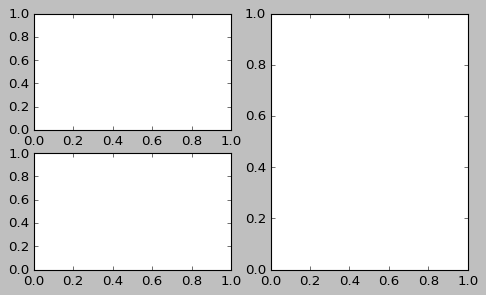

In [ ]:
# Arrange subplots within figure... for reference
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                ['ax2', 'ax3']],
                                figsize=(7, 4))

Text(0.5, 0, 'Label 2: 2 Fast 2 Furious')

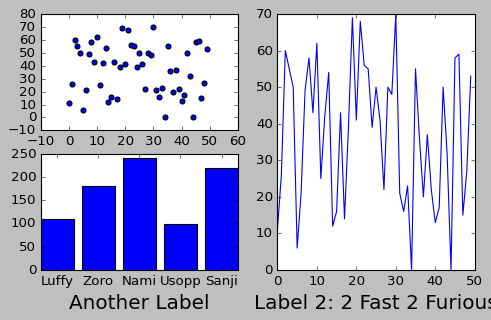

In [ ]:
# Modifying layout
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                ['ax2', 'ax3']],
                                figsize=(7, 4))
someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
someaxes["ax1"].set_xlabel('A Big Label',fontsize=18)
someaxes["ax2"].set_xlabel('Another Label',fontsize=18)
someaxes["ax3"].set_xlabel('Label 2: 2 Fast 2 Furious',fontsize=18) # Adding huge x-axis titles

Text(0.5, 0, 'Label 2: 2 Fast 2 Furious')

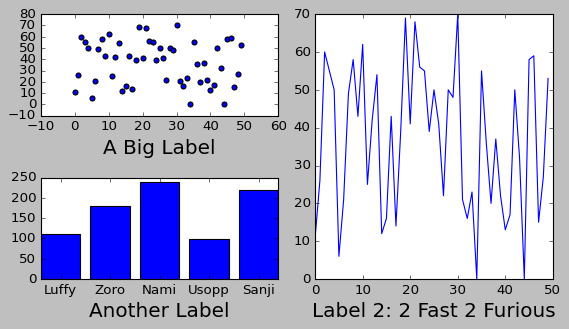

In [23]:
# How does a constrained layout change our plot?
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                ['ax2', 'ax3']],
                                figsize=(7, 4),
                                layout = "constrained")
someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
someaxes["ax1"].set_xlabel('A Big Label', fontsize=18)
someaxes["ax2"].set_xlabel('Another Label', fontsize=18)
someaxes["ax3"].set_xlabel('Label 2: 2 Fast 2 Furious', fontsize=18)

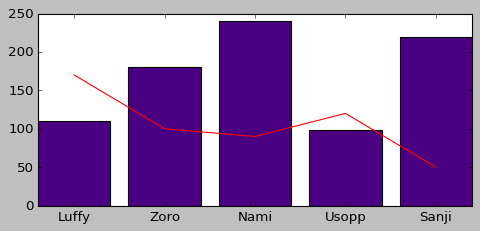

In [24]:
# Multiple viz on one axes object: call multiple plot methods on the same axes
# first make our sample data
x = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])
y2 = np.array([170, 100, 90, 120, 50])
# define our figure and axes (just one this time)
fig, ax = plt.subplots(figsize=(7, 3))
# now call both bar and plot elements to the same axes (ax)
ax.bar(x, y1,
color = "indigo")
ax.plot(x, y2,
color = "red")


<ErrorbarContainer object of 3 artists>

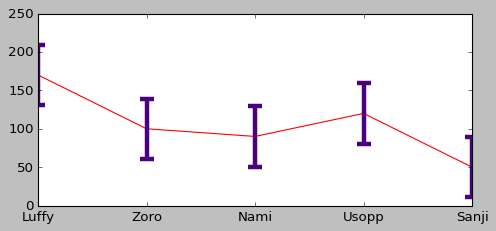

In [ ]:
# How do we add error info?

# First get SD of data
y2_sd = np.std(y2)

# And now plot as before
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")
# And add error bars
ax.errorbar(x,
        y2,
        yerr = y2_sd,
        fmt = "none",
        ecolor= "indigo",
        elinewidth= 4,
        capsize = 6,
        capthick= 4)

<ErrorbarContainer object of 3 artists>

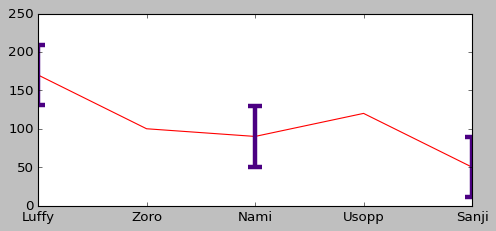

In [31]:
# Errorevery: If we don't want to see them for every point, we specify intervals like so:

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")
# And add error bars
ax.errorbar(x,
        y2,
        yerr = y2_sd,
        fmt = "none",
        ecolor= "indigo",
        elinewidth= 4,
        capsize = 6,
        capthick= 4,
        errorevery=2)

In [ ]:
# Adding images to plots

# Load libraries
from PIL import Image # to open images
import requests # to get images from URLs
from io import BytesIO # to store images

# Get images from internet
response = requests.get("https://static.wikia.nocookie.net/garfield/images/5/5e/GarfieldNoBackground.png/") # The Luffy pic didn't work for me
image_file = BytesIO(response.content)
image = Image.open(image_file)

(np.float64(-0.5), np.float64(267.5), np.float64(416.5), np.float64(-0.5))

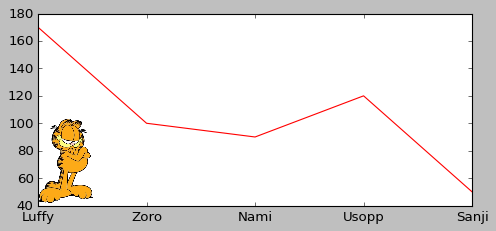

In [46]:
# Now make a basic plot and add the image
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2,
        color = "red")
ax_image = fig.add_axes([0.1, 0.11, 0.15, 0.35])
ax_image.imshow(image)
ax_image.axis("off")

In [54]:
# Saving visualizations
#path = Desktop # fix later, we don't need this rn because I'm saving to same file.

# can be full path or relative path
filename = 'fig1a.png'

plt.savefig(filename, dpi=300)
# note that path shouldn't end with / since filename starts with it

<Figure size 640x480 with 0 Axes>

# Deck 7: Visualization with Purpose - Accessible Data Visualization

### Activity: Alt-text

Good alt-text here should convey essential information in the image as concisely as possible. In this example, we could say something like "two scientists having a discussion in a chemistry laboratory by a fume hood." This is super simple and to the point, but can be adjusted based on the context the picture is in (e.g., is the article about Patrick Gunning? If so, we can name him).

### Activity: Four types of descriptive content

- **Level 1**: This chart is a stacked horizontal bar plot. The title is "The Daily Routines of Famous Creative People". Along the x-axis, we have 24 hours of a day, starting at 12 AM (and sequenced by AM/PM). On the y-axis, there are bars for different famous creative people, like Beethoven and Voltaire. Each person has a stacked bar plot consisting of different colours for sleep (teal), creative work (red), day job/admin (green), food/leisure (yellow), exercise (navy), and other (light blue). Each colour within each person's bar represents that person's time spent doing the corresponding activity.
- **Level 2**: Descriptively, many people are sleeping past 12 AM, with some outliers (particularly Balzac, who wakes at 1 am, and is the only person to take a nap). Every individual has substantial creative work throughout their day, apart from Kant. Food and leisure look quite similar for all individuals here. 
- **Level 3**: Only three individuals have "other" periods shown. Five individuals exercise. Some of the individuals who engage in substantial creative work (eg. Balzac, VOltaire) don't seem to show much food/leisure time.
- **Level 4**: Kant has the least amount of creative work, but this could be because his academic work and writings fall under "day job" and perhaps even "leisure". Notably few people have "day jobs", and it would be apt to have this differentiated from, e.g., philosophical work and how this distinction may have changed through these time periods.